In [3]:
# import libraries
from icecream import ic
from itables import show
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


import warnings

warnings.filterwarnings("ignore")

# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)


# Passo 1

> Utilizando a biblioteca de manipulação de dados, o Pandas, realize o upload da base de dados no Python para iniciar as análises. Ainda utilizando as ferramentas do Pandas, realize análises estatísticas descritivas sobre os dados, explorando todas as variáveis do modelo: variáveis qualitativas e quantitativas.

In [4]:
data: pd.DataFrame = pd.read_csv("../../data/cars.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [5]:
# modifica o tipo dos dados das colunas para melhor aproveitamento de memória e facilitar a análise
data["brand"] = data["brand"].astype("category")
data["model"] = data["model"].astype("category")
data["type"] = data["type"].astype("category")
data["engine_type"] = data["engine_type"].astype("category")
data["link"] = data["link"].astype("string")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     52 non-null     int64   
 1   brand                  52 non-null     category
 2   model                  52 non-null     category
 3   year                   52 non-null     int64   
 4   miles                  52 non-null     int64   
 5   city_mileage           52 non-null     int64   
 6   highway_mileage        52 non-null     int64   
 7   horsepower             52 non-null     int64   
 8   torque                 52 non-null     int64   
 9   engine_capacity_litre  52 non-null     float64 
 10  fuel_capacity          52 non-null     float64 
 11  num_cylinder           52 non-null     int64   
 12  num_seat               52 non-null     int64   
 13  num_owners             52 non-null     int64   
 14  price                  52 non-null     int64

In [6]:
data.isna().sum()


id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

### Tratamento de valores NaN e eliminação de colunas sem poder preditivo


  

A coluna __speed_level__  possui um valor _NaN_. O carro de __id__ = _13_ é aquele que possui o  __speed_level__  = _NaN_. Uma característica importante do veículo é o fato de que ele possui __engine_type__ igual a _hybrid_gas_electric_. Neste caso, para pensarmos em como tratar o dado _NaN_, é razoável verificarmos quais outros veículos da base de dados possuem o mesmo tipo de __engine_type__. 

In [7]:
data.query("engine_type == 'hybrid_gas_electric'").T


,0,7,18
id,3,13,24
brand,Chevrolet,Honda,Honda
model,Volt LT,Clarity,Insight
year,2019,2018,2019
miles,27173,29674,56233
city_mileage,43,44,55
highway_mileage,42,40,49
horsepower,149,212,151
torque,294,99,99
engine_capacity_litre,1.5,1.5,1.5


Como podemos verificar, os outros carros da base que posssem o tipo de __engine_type__ igual a _hybrid_gas_electric__ tem o  __speed_level__  = _6.0_. Então iremos assumir o  __speed_level__  = _6.0_ para o veículo de __id__ = _13_.	

In [8]:
data["speed_levels"] = data["speed_levels"].replace({np.NAN: 6.0})
data.iloc[7, :]


id                                                                      13
brand                                                                Honda
model                                                              Clarity
year                                                                  2018
miles                                                                29674
city_mileage                                                            44
highway_mileage                                                         40
horsepower                                                             212
torque                                                                  99
engine_capacity_litre                                                  1.5
fuel_capacity                                                          7.0
num_cylinder                                                             4
num_seat                                                                 5
num_owners               

In [9]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
id,52.0,31.365385,15.378912,3.0,18.750,31.5,44.25,57.0
year,52.0,2018.673077,1.396370,2014.0,2018.000,2019.0,2019.25,2022.0
miles,52.0,33901.250000,22700.646139,5000.0,16454.750,27448.5,42442.00,97027.0
city_mileage,52.0,29.038462,5.947356,17.0,26.500,30.0,30.00,55.0
highway_mileage,52.0,37.423077,4.136619,24.0,35.750,38.0,40.00,49.0
horsepower,52.0,176.865385,33.793507,143.0,152.000,159.5,192.00,288.0
torque,52.0,177.923077,47.256433,99.0,138.000,181.0,192.00,294.0
engine_capacity_litre,52.0,1.832692,0.379743,1.4,1.500,2.0,2.00,3.5
fuel_capacity,52.0,14.232692,2.603973,7.0,12.400,13.6,15.05,19.0
num_cylinder,52.0,4.038462,0.277350,4.0,4.000,4.0,4.00,6.0


- A coluna __condition__ possui somente um valor não-nulo. A alternativa à eliminação seria a interpolação ou repetição de valores, o que não iria auxiliar a elaboração do modelo.

- A coluna __link__ corresponde ao endereço do carro na página das empresas. Logo, não parece ter qualquer valor preditivo e também deverá ser eliminada.

- A coluna __doors__ corresponde à quantidade de portas dos carros.  Como todos os carros da base possuem 4 portas, a coluna não irá auxiliar a elaboração do modelo.

- A coluna __num_seat__ corresponde ao número de assentos dos carros.  Como todos os carros da base possuem 5 assentos, a coluna não irá auxiliar a elaboração do modelo.

- A coluna __id__ ser somente como número identificador de cada carro, logo a coluna pode ser eliminada.

In [10]:
data: pd.DataFrame = data.drop(
    columns=["condition", "link", "doors", "id", "num_seat"]
)  # removendo as colunas 'condition' e 'link'


## Análise das variáveis qualitativas 

In [11]:
# dataframe que contém somente as colunas com dados qualitativos
data_quali: pd.DataFrame = data.select_dtypes(include=["category"])
data_quali.value_counts()


brand       model       type   engine_type        
Honda       Civic       sedan  gas                    14
            Accord      sedan  gas                     7
Volkswagen  Jetta       sedan  gas                     7
Hyundai     Elantra SE  sedan  gas                     4
Volkswagen  Passat      sedan  gas                     4
Ford        Fusion      sedan  gas                     3
Hyundai     Sonata      sedan  gas                     3
Chevrolet   Malibu      sedan  gas                     2
Subaru      Impreza     sedan  gas                     2
Chevrolet   Volt LT     sedan  hybrid_gas_electric     1
Ford        Focus       sedan  gas                     1
            Taurus      sedan  gas                     1
Honda       Clarity     sedan  hybrid_gas_electric     1
            Insight     sedan  hybrid_gas_electric     1
Subaru      Legacy      sedan  gas                     1
Name: count, dtype: int64

In [12]:
# desenha os gráficos de barras na forma de subplots
def plotly_subplots_bar(nrows, ncols, subplot_titles, data_frame) -> None:
    fig = make_subplots(rows=nrows, cols=ncols, subplot_titles=subplot_titles)

    i = 1
    j = 1
    for col in data_frame.columns:
        fig.add_trace(
            go.Bar(
                x=data_frame[col].value_counts().index,
                y=data_frame[col].value_counts().values,
                name=col,
            ),
            row=i,
            col=j,
        )
        fig.update_yaxes(title_text="quantidade")

        if i < nrows:
            i += 1
            if j < ncols:
                j += 1
            else:
                j = 1
        else:
            i = 1

    fig.update_layout(
        height=750, width=750, title_text="Variáveis qualitativas da base de dados"
    )

    fig.show()


plotly_subplots_bar(2, 2, ["marca", "tipo", "tipo de motor", "modelo"], data_quali)


Observações sobre as variáveis qualitativas:
- __brand__:  A marca é um atributo que descreve a origem ou o fabricante do produto. Neste caso, as marcas correspondem a 6 categorias: 'Chevrolet', 'Hyundai', 'Ford', 'Honda', 'Subaru', 'Volkswagen'. A marca mais frequente na base de dados é 'Honda', com 23 ocorrências, seguida por 'Volkswagen', com 11 ocorrências. As marcas com a menor quantidade de dados na base são 'Subaru' e Chevrolet, ambas com 3 ocorrências.
- __type__: O único tipo de carro presente na base o 'sedan'.
- __engine_type__: existem dois tipos de motor na base de dados, quais sejam: 'gas' (49 veículos) e 'hybrid_gas_eletric' (3 veículos). 
- __model__:  Existem 15 modelos de veículos na base de dados, sendo mais frequente o 'Civic' (14 carros) e os menos frequentes, com apenas 1 ocorrência são: 'Focus', 'Clarity', 'Legacy', 'Taurus' e 'Volt LT'.


### Transformação das variáveis qualitativas em variáveis _dummy_ (one-hot encoding)

Considerando que _type_ é uma variável que apresenta somente uma categoria, ela não será considerada no modelo. Logo, somente as outras variáveis serão submetidas ao _encoding_. Mesmo não sendo o mais eficiente em termos de alocação de espaço em memória, como ele é de fácil compreensão e a base de dados é pequena, entendemos ser conveniente utilizar este método.

In [13]:
d_engine_type = pd.get_dummies(
    data_quali[["engine_type"]], drop_first=True, dtype=float
)
d_brand = pd.get_dummies(data_quali[["brand"]], drop_first=True, dtype=float)
d_model = pd.get_dummies(data_quali[["model"]], drop_first=True, dtype=float)


In [14]:
d_model


,model_Civic,model_Clarity,model_Elantra SE,model_Focus,model_Fusion,model_Impreza,model_Insight,model_Jetta,model_Legacy,model_Malibu,model_Passat,model_Sonata,model_Taurus,model_Volt LT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
d_brand


,brand_Ford,brand_Honda,brand_Hyundai,brand_Subaru,brand_Volkswagen
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0


In [16]:
d_engine_type


,engine_type_hybrid_gas_electric
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,0.0
9,0.0


## Análise das variáveis quantitativas

In [17]:
data_quanti: pd.DataFrame = data.select_dtypes(exclude=["category"])
show(data_quanti)


### Estatística descritiva

In [18]:
show(data_quanti.describe().T)


### Histograma


In [19]:
def plotly_subplots_hist(nrows, ncols, data_frame) -> None:
    columns: list[str] = data_frame.columns.to_list()

    fig = make_subplots(rows=nrows, cols=ncols, subplot_titles=columns)

    k = 0
    # Add a box plot for each column
    for i in range(nrows):
        for j in range(ncols):
            if k < len(columns):
                fig.add_trace(
                    go.Histogram(x=data_frame[columns[k]], nbinsx=15),
                    row=i + 1,
                    col=j + 1,
                )
                k += 1
            else:
                break

    # Update the layout
    fig.update_layout(
        height=800,
        width=1000,
        showlegend=False,
        margin=dict(t=50, l=10, r=10, b=10),
        title_text="Histograma das variáveis quantitativas da base de dados",
    )

    fig.show()


plotly_subplots_hist(5, 4, data_quanti)



Os histogramas para as variáveis _num_cylinder_ e _wheel_drive_ mostram que estas podem não ser muito úteis para a construção do modelo de regressão visto que apresentam basicamente duas "categorias". No caso de _num_cylinder_ são 51 dados do total de 52 que possuem 6 cilindros. Já para a variável _wheel_drive_, 48 dados de 52 possuem 2. Vamos verificar quais são os veículos com _num_cylinder = 6 e _whell_drive_ = 4.

In [20]:
pd.concat([data_quanti.query("num_cylinder == 6 | wheel_drive == 4").T], axis=1)
# data_quanti.query('num_cylinder == 6').T
data_quanti.query("wheel_drive == 4").T


,6,20,21,32
year,2022.0,2019.0,2020.0,2019.0
miles,6811.0,38097.0,35743.0,44371.0
city_mileage,27.0,17.0,20.0,28.0
highway_mileage,35.0,24.0,29.0,38.0
horsepower,182.0,288.0,245.0,152.0
torque,176.0,254.0,275.0,145.0
engine_capacity_litre,2.5,3.5,2.0,2.0
fuel_capacity,18.5,19.0,18.0,13.2
num_cylinder,4.0,6.0,4.0,4.0
num_owners,1.0,3.0,1.0,2.0


É interessante notarmos que, apesar das características de _outliers_, o carro da coluna __6__ é o que possui o preço mais alto da base. Ou seja, tanto o _wheel_drive_ como o _num_cylinder_ estão relacionados de algum modo ao preço do carro, por exemplo. 

### Box-plot

In [21]:
# Medidas estatísicas para o dataframe
def plotly_subplots_box(nrows, ncols, data_frame) -> None:
    columns: list[str] = data_frame.columns.to_list()

    fig = make_subplots(rows=nrows, cols=ncols, subplot_titles=columns)

    k = 0
    # Add a box plot for each column
    for i in range(nrows):
        for j in range(ncols):
            if k < len(columns):
                fig.add_trace(
                    go.Box(
                        px.box(
                            y=data_frame[columns[k]],
                            orientation="v",
                            color_discrete_sequence=["lightseagreen"],
                        ).data[0]
                    ),
                    row=i + 1,
                    col=j + 1,
                )
                k += 1
            else:
                break

    # Update the layout
    fig.update_layout(
        height=850,
        width=1000,
        showlegend=False,
        margin=dict(t=50, l=10, r=10, b=10),
        title_text="Box-plot das variáveis quantitativas da base de dados",
    )

    fig.show()


plotly_subplots_box(5, 4, data_quanti)


Os gráficos de box-plot revelam que existem _outliers_ em todas as variáveis, exceto em _front_headroom_. O box-plot para as variáveis _wheel_drive_ e _num_cylinder_  corrobora as observações feitas na seção anterior com base no histograma, uma vez que _wheel_drive_ = 4 e _num_cylinder_ = 6 são, de fato, _outliers_.
Como temos uma quantidade pequena de dados na base (apenas 52), em princípio nenhuma linha será eliminada, ainda que esta corresponda a um _outlier_. Também é importante destacar que as características divergentes podem eventualmente contribuir para um melhor entendimento dos dados.

### Correlação

Abaixo calculamos a correlação entre as variáveis considerando tanto o coeficiente de _pearson_, como o coeficiente de _spearman_.
- Coeficiente de Correlação de Pearson: Mede a força e a direção de uma relação linear entre duas variáveis contínuas.
- Coeficiente de Correlação de Postos de Spearman: Mede a força e a direção de uma relação monotônica entre duas variáveis contínuas ou ordinais. Uma relação monotônica significa que as variáveis tendem a mudar juntas, mas não necessariamente a uma taxa constante.

Principais diferenças entre os dois coeficientes

- Quanto ao tipo de relação entre as variáveis:
    - Pearson: Relações estritamente lineares.
    - Spearman: Relações lineares e monótonas não lineares.

- Quanto aos requisitos dos dados:
    - Pearson: Assume dados com distribuição normal e é sensível a outliers.
    - Spearman: Funciona com dados ordinais (dados classificados) e é mais robusto a outliers.

As informações acima são importantes para posterior tomada de decisão quanto a qual coeficiente tomar como referência para a construção do modelo.

#### Pearson - Mapa de Calor

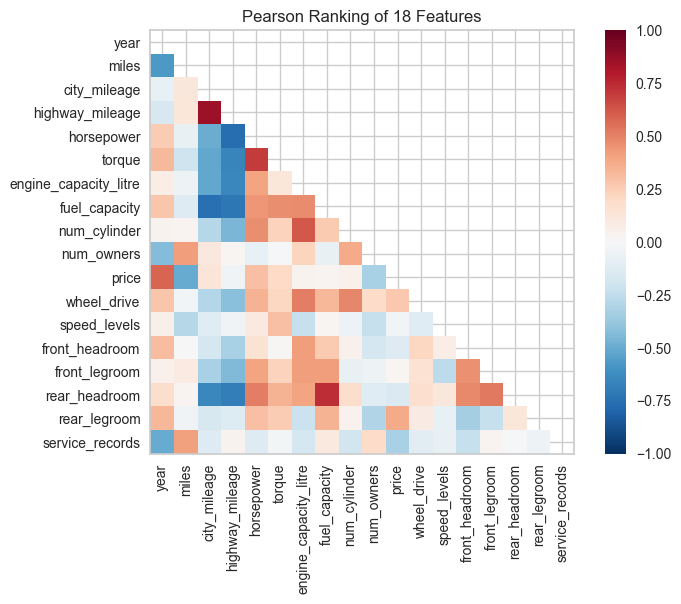

<Axes: title={'center': 'Pearson Ranking of 18 Features'}>

In [22]:
# mapa de correlação entre as variáveis quantitativas
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(data_quanti)
visualizer.show()


#### Spearman - Mapa de Calor

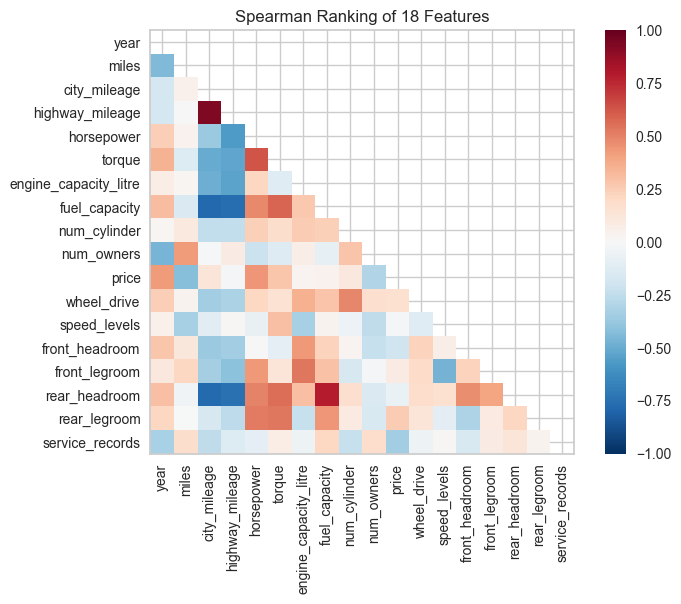

<Axes: title={'center': 'Spearman Ranking of 18 Features'}>

In [23]:
visualizer = Rank2D(algorithm="spearman")
visualizer.fit_transform(data_quanti)
visualizer.show()


#### Pearson - Matriz

In [24]:
# para facilitar a visualização das correlações
show(data_quanti.corr())


#### Spearman - Matriz

In [25]:
show(data_quanti.corr(method="spearman"))


#### Identificação de alta correlação entre colunas

In [26]:
# método para verificar se existem colunas altamente correlacionadas (corr > 0.95)
def correlated_cols(data_frame, method="pearson", threshold=0.95) -> pd.DataFrame:
    return data_frame.corr(method=method).pipe(
        lambda df1: pd.DataFrame(
            np.tril(df1, k=-1), columns=df1.columns, index=df1.columns
        )
        .stack()
        .rename("pearson")
        .pipe(lambda s: s[s.abs() > threshold].reset_index())
        .query("level_0 not in level_1")
    )


show(correlated_cols(data_quanti))
show(correlated_cols(data_quanti, method="spearman"))
# como a análise de correlação não mostra nenhuma coluna com alto grau de correlação, por este critério, nenhuma coluna será removida


Não foram identificadas colunas que apresentem multicolineariedade relevante tanto avaliando o coeficiente conforme _spearman_, como conforme _pearson_. 

O requisito do desafio é que seja construído um modelo de regressão. Neste caso a multicolinearidade se revala importante tanto para o cenário de buscar um modelo de regressão para explicar a variável dependente em função das variáveis independentes, como para o caso em que o objetivo seja estritamente a construção de um modelo preditivo. Lembrando que neste último cenário certas hipóteses do modelo de regressão linear podem ser relaxadas.

#### Correlação em relação ao preço (_price_)

In [27]:
# considerando que o modelo de regressão tomará como variável dependente o preço em termos absolutos:
show(
    pd.concat(
        [
            data_quanti.corr(method="pearson")
            .T["price"]
            .abs()
            .sort_values(ascending=False)
            .rename("price_pearson"),
            data_quanti.corr(method="spearman")
            .T["price"]
            .abs()
            .sort_values(ascending=False)
            .rename("price_spearman"),
        ],
        axis=1,
    )
)


Como _price_ é a candidata a variável dependente, os módulos dos coeficientes de correlação em relação a ela foram apresentados na tabela acima. 

As colunas estão em ordem crescente. Primeiramente será tomado como referência o coeficiente de correlação de _pearson_. As variáveis de _year_ a _front_head_room_ apresentam coeficientes de correlação acima de __0.10__, sugerindo maior poder explicativo. Quando se toma o coeficiente de correlação de _spearman_ como referência, a diferença é que nesse rol podemos incluir a variável _num_cylinder_, e excluir a variável _rear_headroom_.

Em que pese as observações acima serem úteis para a definição do modelo, algumas outras análises podem ser feitas de modo que a decisão seja mais assertiva, sendo contejadas inclusive com os resultados anteriores.

### Anaĺise conjunta -  variáveis qualitativas e quantitativas

Nesta seção realizaremos a análise de correlação considerando conjuntamente as variáveis quantitativas e qualitativas de modo que tenhamos mais informações sobre quais variáveis podem colaborar para a construção do modelo preditivo.

Para tornar a análise mais interessante

In [28]:
data.columns.__len__()


22

In [29]:
print(
    f"variáveis qualitativas:{data_quali.columns}\n variáveis quatitativas:{data_quanti.columns}"
)


variáveis qualitativas:Index(['brand', 'model', 'type', 'engine_type'], dtype='object')
 variáveis quatitativas:Index(['year', 'miles', 'city_mileage', 'highway_mileage', 'horsepower',
       'torque', 'engine_capacity_litre', 'fuel_capacity', 'num_cylinder',
       'num_owners', 'price', 'wheel_drive', 'speed_levels', 'front_headroom',
       'front_legroom', 'rear_headroom', 'rear_legroom', 'service_records'],
      dtype='object')


In [30]:
[data_quali[col].unique() for col in data_quali.columns]


[['Chevrolet', 'Hyundai', 'Ford', 'Honda', 'Subaru', 'Volkswagen']
 Categories (6, object): ['Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Subaru', 'Volkswagen'],
 ['Volt LT', 'Elantra SE', 'Focus', 'Civic', 'Legacy', ..., 'Taurus', 'Fusion', 'Malibu', 'Passat', 'Sonata']
 Length: 15
 Categories (15, object): ['Accord', 'Civic', 'Clarity', 'Elantra SE', ..., 'Passat', 'Sonata', 'Taurus', 'Volt LT'],
 ['sedan']
 Categories (1, object): ['sedan'],
 ['hybrid_gas_electric', 'gas']
 Categories (2, object): ['gas', 'hybrid_gas_electric']]

Considerando que das variáveis qualitativas somente a _engine_type_ é razoável de se colocar em uma análise de correlação conjunta em face do pequeno número de categorias - duas. 

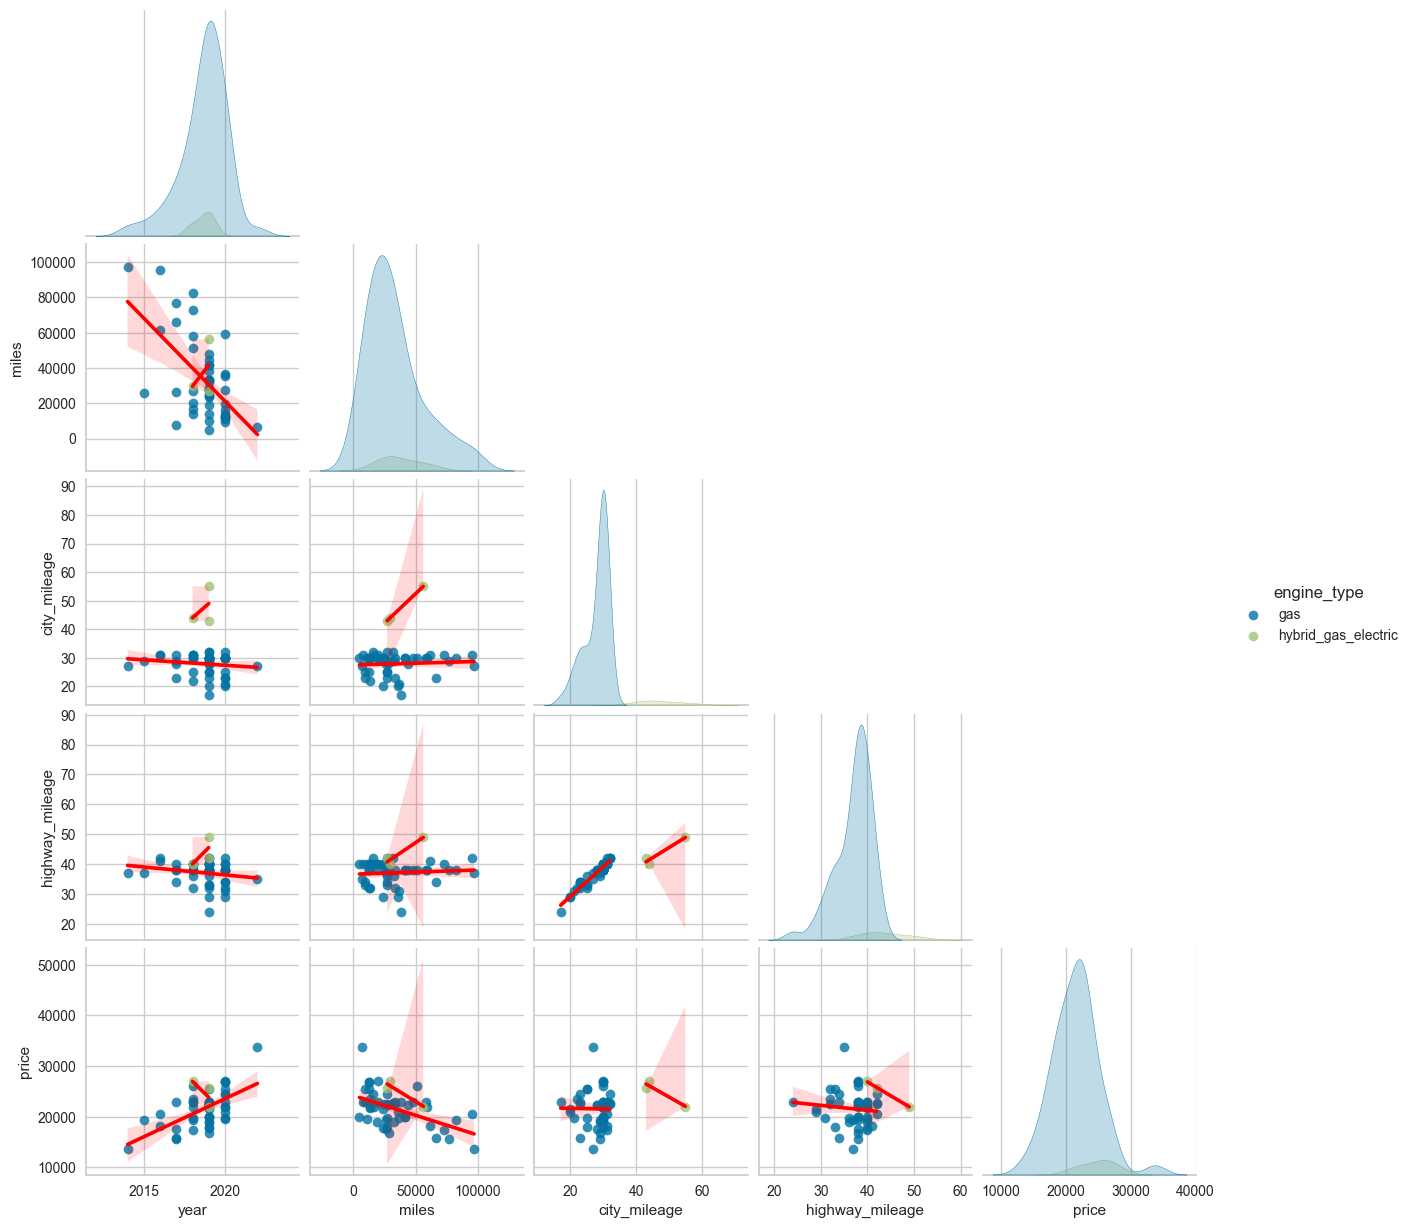

In [31]:
from seaborn import pairplot

vars = data_quanti.columns[0:4]
vars = vars.append(pd.core.indexes.base.Index([data_quanti.columns[10]]))
newdf = data_quanti.copy()
newdf["engine_type"] = data_quali["engine_type"]
p = pairplot(
    newdf,
    hue="engine_type",
    vars=vars,
    kind="reg",
    corner=True,
    height=2.5,
    aspect=1,
    plot_kws={"line_kws": {"color": "red"}},
)


No gráfico acima podemos perceber que, em relação a _price_, a correlação considerando as categorias de _engine_type_ demonstram que _hidryd_gas_eletric_ possui um sinal oposto àquele de _gas_. Ao mesmo tempo, devemos considerar que existem poucas amostras com _engine_type_ igual a _hidryd_gas_eletric_. Logo, é razoável esperarmos que o modelo seja explicado em função do _engine_type_ igual a _gas_. 

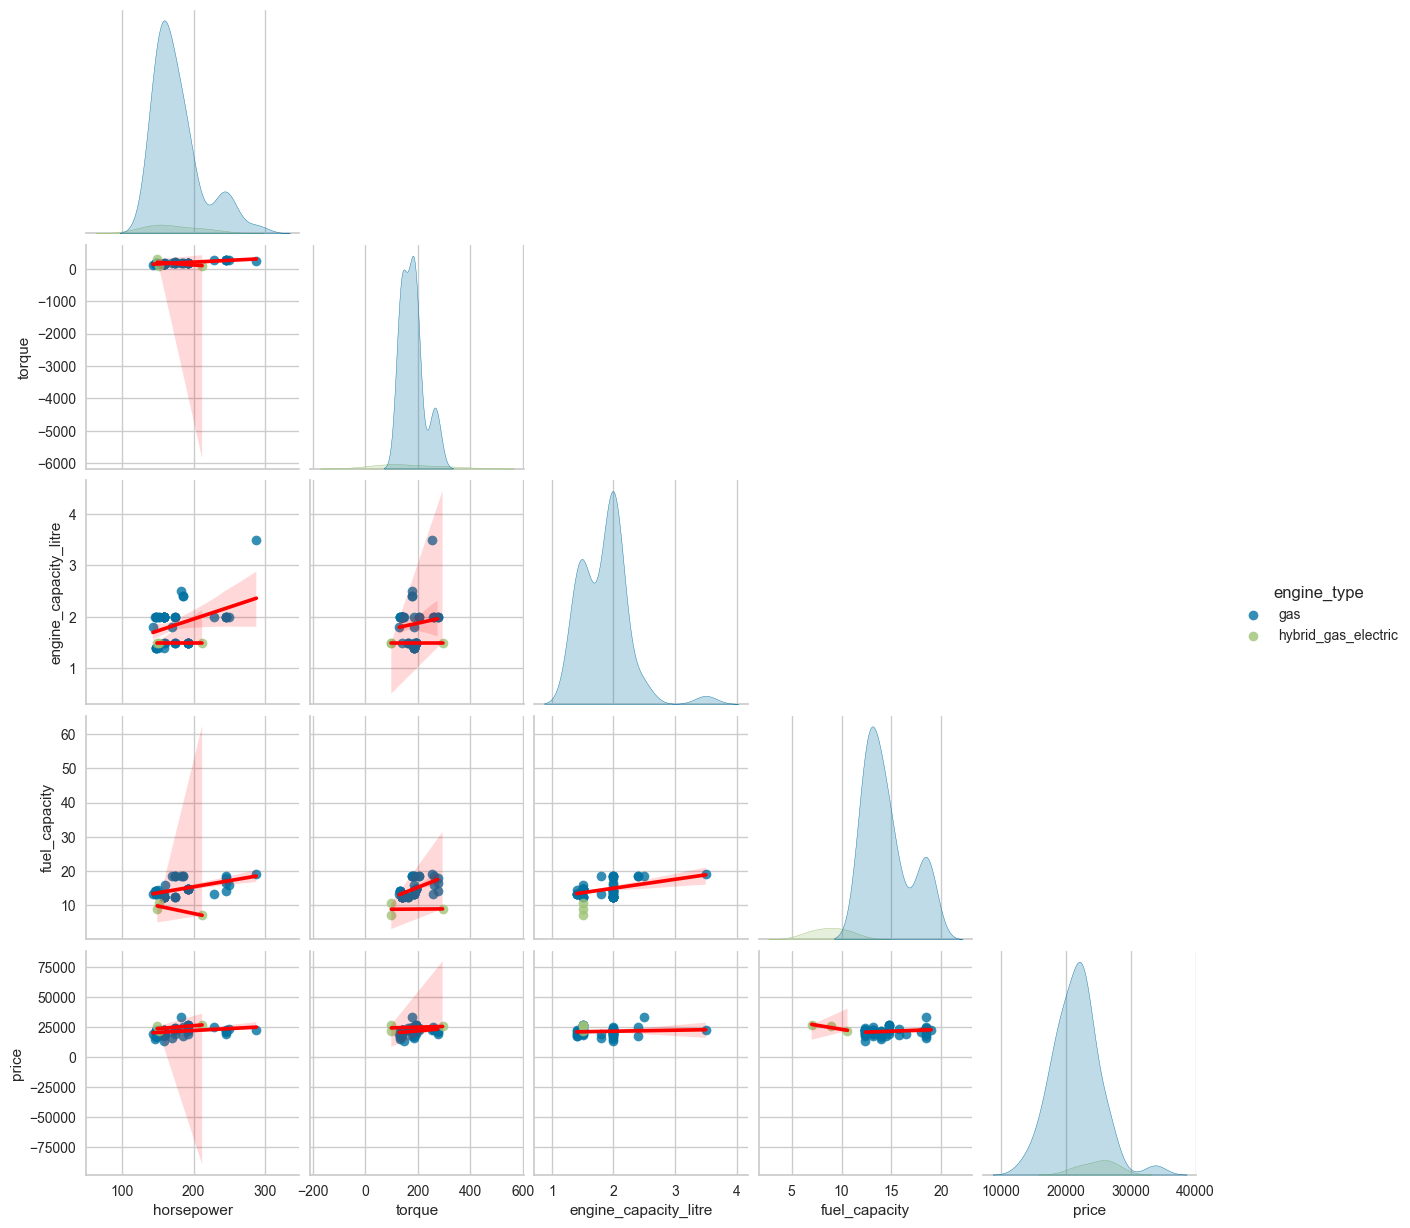

In [32]:
vars = data_quanti.columns[4:8]
vars = vars.append(pd.core.indexes.base.Index([data_quanti.columns[10]]))
newdf = data_quanti.copy()
newdf["engine_type"] = data_quali["engine_type"]
p = pairplot(
    newdf,
    hue="engine_type",
    vars=vars,
    kind="reg",
    corner=True,
    height=2.5,
    aspect=1,
    plot_kws={"line_kws": {"color": "red"}},
)


Diferente do observado no gráfico anterior, podemos perceber que, em relação a _price_, a correlação considerando as categorias de _engine_type_ demonstram que _hidryd_gas_eletric_ possuem o mesmo sinal. 

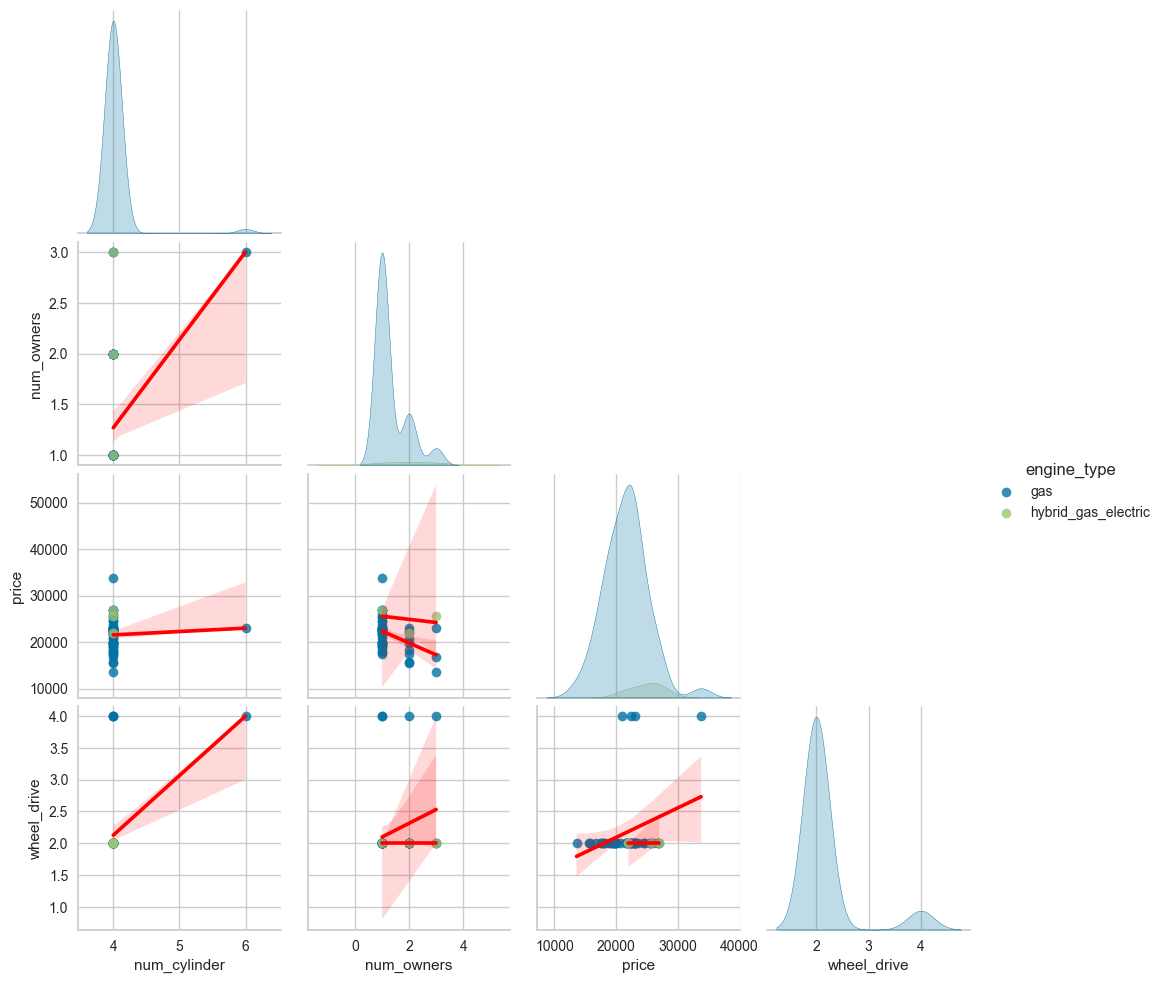

In [33]:
vars = data_quanti.columns[8:12]
newdf = data_quanti.copy()
newdf["engine_type"] = data_quali["engine_type"]
p = pairplot(
    newdf,
    hue="engine_type",
    vars=vars,
    kind="reg",
    corner=True,
    height=2.5,
    aspect=1,
    plot_kws={"line_kws": {"color": "red"}},
)


Aqui temos podemos perceber outro aspecto relevante dos dados: ainda que as variáveis _wheel_drive_ e _num_owners_ tenham sido inicialmente tratadas como numéricas, pode ser que elas possam entrar no modelo como variáveis categóricas. Isto porque, percebemos que no máximo temos três valores associados à variável.  

Uma observação mais geral é que os gráficos de distribuição das variáveis, por meio das inspeção visual, denotam que estas não seguem uma distribuição normal, sendo em vários casos multimodais, o que implica a necessidade de termos maior cautela quanto à análise das estatísticas de média, mediana e desvio-padrão. 

A multimodalidade inclusive ocorre especialmente nas variáveis que possuem uma característica mais categórica, o que pode reforçar a sua análise como categóricas ao invés de numéricas.

Finalmente os gráficos podem também indicar a necessidade de normalização dos dados para termos um modelo mais acurado, pois as distorções observadas nos gráficos também ocorrem em face do fato de estarmos comparando variáveis que são de escalas bastante distintas - por exemplo, _engine_capacity_litter_ e _price_.

## Encoding das variáveis qualitativas (Label Encoding)

Como destacado na seção anterior, iremos considerar _num_cylinder_ e _num_owners_ como variáveis categóricas para evitar distorções em face de suas caractísticas.

In [34]:
from sklearn import preprocessing

new_df = data_quali.copy()
new_df.drop(["type"], axis=1, inplace=True)
new_df["num_cylinder"] = data_quanti["num_cylinder"]
new_df["num_owners"] = data_quanti["num_owners"]
label_encoder = preprocessing.LabelEncoder()
encoded_cols = [label_encoder.fit_transform(new_df[col]) for col in new_df.columns]
df_encoded_vars = pd.DataFrame(encoded_cols).T
df_encoded_vars.columns = [str(j) + "_enc" for j in new_df.columns]
show(df_encoded_vars)


In [35]:
df_encoded_vars.nunique()


brand_enc            6
model_enc           15
engine_type_enc      2
num_cylinder_enc     2
num_owners_enc       3
dtype: int64

Agora podemos novamente realizar a análise de correlação entre as variáveis de interesse e a variável alvo para comerçarmos a entender, no conjunto total, quais variáveis podem ser interessantes para o modelo.

## Dados após o encoding

In [36]:
df_encoded_vars = df_encoded_vars.astype(
    "category"
)  # conversão das variáveis qualitativas e 'encodadas' para o tipo category
data_with_encoding = pd.concat(
    [data_quanti.drop(["num_owners", "num_cylinder"], axis=1), df_encoded_vars], axis=1
)
show(data_with_encoding)


In [37]:
data_with_encoding.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   year                   52 non-null     int64   
 1   miles                  52 non-null     int64   
 2   city_mileage           52 non-null     int64   
 3   highway_mileage        52 non-null     int64   
 4   horsepower             52 non-null     int64   
 5   torque                 52 non-null     int64   
 6   engine_capacity_litre  52 non-null     float64 
 7   fuel_capacity          52 non-null     float64 
 8   price                  52 non-null     int64   
 9   wheel_drive            52 non-null     int64   
 10  speed_levels           52 non-null     float64 
 11  front_headroom         52 non-null     float64 
 12  front_legroom          52 non-null     float64 
 13  rear_headroom          52 non-null     float64 
 14  rear_legroom           52 non-null     float

### Estatística descritiva

In [38]:
from statsmodels.stats import descriptivestats

descriptivestats.describe(
    data_with_encoding,
    stats=[
        "nobs",
        "distinct",
        "mean",
        "median",
        "std",
        "std_err",
        "ci",
        "coef_var",
        "max",
        "min",
        "skew",
        "kurtosis",
        "percentiles",
        "jarque_bera",
    ],
    percentiles=(25, 50, 75, 95),
).T


,nobs,distinct,mean,median,std,std_err,upper_ci,lower_ci,coef_var,max,min,skew,kurtosis,jarque_bera,jarque_bera_pval,25%,50%,75%,95%
year,52.0,NaN,2018.673077,2019.0,1.39637,0.193642,2019.052608,2018.293546,0.000692,2022.0,2014.0,-1.059167,5.017476,18.541366,0.000094,2018.0,2019.0,2019.25,2020.0
miles,52.0,NaN,33901.25,27448.5,22700.646139,3148.013217,40071.242528,27731.257472,0.669611,97027.0,5000.0,1.124708,3.655826,11.894965,0.002612,16454.75,27448.5,42442.0,79545.6
city_mileage,52.0,NaN,29.038462,30.0,5.947356,0.82475,30.654942,27.421982,0.20481,55.0,17.0,1.736847,9.429863,115.721012,0.0,26.5,30.0,30.0,36.95
highway_mileage,52.0,NaN,37.423077,38.0,4.136619,0.573646,38.547402,36.298752,0.110537,49.0,24.0,-0.667275,4.704373,10.152812,0.006242,35.75,38.0,40.0,42.0
horsepower,52.0,NaN,176.865385,159.5,33.793507,4.686316,186.050396,167.680373,0.191069,288.0,143.0,1.438006,4.411878,22.240497,0.000015,152.0,159.5,192.0,245.0
torque,52.0,NaN,177.923077,181.0,47.256433,6.553288,190.767286,165.078868,0.2656,294.0,99.0,0.786842,2.986535,5.366103,0.068354,138.0,181.0,192.0,275.0
engine_capacity_litre,52.0,NaN,1.832692,2.0,0.379743,0.052661,1.935906,1.729479,0.207205,3.5,1.4,1.582139,8.21717,80.668273,0.0,1.5,2.0,2.0,2.4
fuel_capacity,52.0,NaN,14.232692,13.6,2.603973,0.361106,14.940447,13.524937,0.182957,19.0,7.0,0.145809,3.173177,0.249233,0.882835,12.4,13.6,15.05,18.5
price,52.0,NaN,21763.423077,21998.5,3532.455322,489.863415,22723.537728,20803.308426,0.162312,33777.0,13590.0,0.462578,4.362764,5.87825,0.052912,19519.0,21998.5,22996.0,26878.0
wheel_drive,52.0,NaN,2.153846,2.0,0.538138,0.074626,2.300111,2.007581,0.24985,4.0,2.0,3.175426,11.083333,228.959491,0.0,2.0,2.0,2.0,4.0


Acima estão as medidas estatísticas estendidas para a base de dados ajustadas. Algumas observações importantes:
- Para as variáveis categóricas os valores são NaN (conforme esperado);
- A curtose (_kurtosis_) em quase todos os casos é maior que 3 (_leptokurtosis_ ou curtose positiva), indicando que a distribuição difere da normal (valor igual a 3) e possui uma calda longa. No caso da curtose menor que 3, a distribuição possui uma curtose negativa (_platykurtosis_) e a calda estreita;
- A assimetria (_skew_) mostra que algumas das distribuições são assimétricas à direita e outras à esquerda. Novamente, no caso da distribuição normal a assimetria é zero;
- O teste de normalidade de jarque-bera será analisado posteriormente na seção de testes de hipótese.

## Análise de Correlação com _price_

In [39]:
df_corr = pd.concat(
    [
        data_with_encoding.corr(method="pearson")
        .T["price"]
        .abs()
        .sort_values(ascending=False)
        .rename("price_pearson"),
        data_with_encoding.corr(method="spearman")
        .T["price"]
        .abs()
        .sort_values(ascending=False)
        .rename("price_spearman"),
    ],
    axis=1,
)
show(df_corr)


In [40]:
fig = px.bar(
    df_corr, title="Correlação entre as variáveis e o preço", width=800, height=600
)
fig.update_layout(bargap=0.1, margin=dict(l=10, r=10, t=30, b=10))
fig.show()


Ulizando-se do mesmo critério citado anteriormente, pela análise de correlação poderíamos excluir todas as variáveis cujo coeficiente de correlação, em módulo, seja menor que 0.10. Neste caso excluiríamos de _model_enc_ a _highway_mileage_.



## Testes Estatísticos

Os testes estatísticos auxiliam na identificação de características relevantes no processo gerador de dados. Neste sentido, podem orientar não somente na identificação das variáveis de interesse, mas também nas limitações do modelo, uma vez que os dados não necessariamente atenderão premissas importantes (como a normalidade).

### Testes de Normalidade

#### Shapiro-Wilk e Kolmogorov-Smirnov
Hipóteses:
- H<sub>0</sub> : a distribuição segue a normal
- H<sub>1</sub> : a distribuição não segue a normal

P-valor:
- P-valor menor que o nível de significância: Rejeita-se a hipótese nula de normalidade.
- P-valor maior que o nível de significância: Não há evidências suficientes para rejeitar a hipótese nula de normalidade.

In [41]:
import scipy.stats as stats


def normality_test(data_frame: pd.DataFrame) -> pd.DataFrame:
    shapiro_test = []
    ks_test = []

    for col in data_frame.columns:
        shapiro_test.append(stats.shapiro(data_frame[col]).pvalue)
        ks_test.append(stats.kstest(data_frame[col], "norm").pvalue)
    return pd.DataFrame(
        [shapiro_test, ks_test], columns=data_frame.columns, index=["shapiro", "ks"]
    ).T


df_norm_test = normality_test(data_with_encoding)

show(df_norm_test.query("shapiro > 0.05 | ks > 0.05"))


Vemos que a variável _price_ foi a única em que H0 não foi rejeitada. Como _price_ é a nossa variável-alvo, este é um resultado importante.

#### Jarque-Bera

Hipóteses:
- H<sub>0</sub> : a distribuição segue a normal
- H<sub>1</sub> : a distribuição não segue a normal

P-valor:
- P-valor menor que o nível de significância: Rejeita-se a hipótese nula de normalidade.
- P-valor maior que o nível de significância: Não há evidências suficientes para rejeitar a hipótese nula de normalidade.

In [42]:
ds = descriptivestats.describe(
    data_with_encoding,
    stats=["nobs", "skew", "kurtosis", "percentiles", "jarque_bera"],
    percentiles=(25, 50, 75, 95),
).T
show(ds.query("jarque_bera_pval > 0.05"))


Na tabela acima podemos verificar que, de acordo com o teste de Jarque-Bera, para as variáveis _torque_, _fuel_capacity_, _price_, front_headroom, _rear_headroom_ e _rear_legroom_ a hipótese nula de não-normalidade não pode ser rejeitada. Isto resulta do fato de que o teste toma como base a assimetria e a curtose, as quais se aproximam dos valores da distribuição normal, respectivamente 0 e 3.

### Teste de associação entre variáveis - Teste de Kendall

Hipóteses:
- H<sub>0</sub> : as variáveis são independentes
- H<sub>1</sub> : as variáveis não são independentes

P-valor:
- P-valor menor que o nível de significância: Rejeita-se a hipótese nula de independência e conclui-se que existe uma relação entre as variáveis.
- P-valor maior que o nível de significância: Não há evidências suficientes para rejeitar a hipótese nula de independência.

O teste de Kendall pode ser aplicado para verificar se duas variáveis são independentes. Também mede o coeficiente de correlação entre as variáveis.

In [43]:
import itertools


def kendall_test(df) -> pd.DataFrame:
    dict_res = {}
    for c in itertools.combinations(df.columns, 2):
        x = df[c[0]].T.to_numpy()
        y = df[c[1]].T.to_numpy()
        res = stats.kendalltau(x, y)
        dict_res[str(c[0] + "-" + c[1])] = {"corr": res.correlation, "pval": res.pvalue}

    df_t = pd.DataFrame(dict_res).T.reset_index().rename(columns={"index": "var"})
    df_t[["var1", "var2"]] = df_t["var"].str.split("-", expand=True)
    df_t = df_t.set_index(["var1", "var2"])
    df_t.drop("var", axis=1, inplace=True)

    return df_t


df_kendall = kendall_test(data_with_encoding)
show(df_kendall)


In [44]:
df_kendall_indep = df_kendall.query(
    "pval > 0.05"
)  # somente as variáveis que não rejeitam H0
df_kendall_indep.loc["price"]  # somente para a variável price


,corr,pval
var2,,
wheel_drive,0.135023,0.242932
speed_levels,-0.018722,0.869430
front_headroom,-0.122673,0.218981
front_legroom,0.057848,0.571833
rear_headroom,-0.052061,0.607523
rear_legroom,0.189261,0.064044
brand_enc,-0.097507,0.354776
model_enc,-0.066677,0.506430
engine_type_enc,0.197428,0.087752


Segundo o teste de kendall, as variáveis _speed_levels_, _front_headroom_, front_legroom, _rear_headroom_, _rear_legroom_, _brand_enc_, _model_enc_, _engine_type_enc_ e _num_cylinder_enc_ são independentes em relação a _price_. Logo, podemos dizer que tais variáveis são forte candidatas a figurar como variáveis dependentes (_features_) no modelo. Inclusive, existe também independência entre as próprias _features_, o que implica a inexistência de multicolinearidade.

In [125]:
list_indep_var_price = df_kendall_indep.loc["price"].reset_index()["var2"].to_list()


## Análise PCA - Redução de dimensionalidade

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [126]:
list_indep_var_price.append("price")


In [127]:
",".join(list_indep_var_price.append("price"))


TypeError: can only join an iterable

In [121]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_with_encoding[','.join(list_indep_var_price.append("price"))]])


KeyError: "None of [Index([None], dtype='object')] are in the [columns]"

In [57]:
pca = PCA()
pca.fit(scaled_data)
reduced_data = pca.transform(scaled_data)


In [58]:
print(pca.explained_variance_ratio_)


[0.28045813 0.14222657 0.11212194 0.09608356 0.08092402 0.0687037
 0.0473658  0.03941465 0.03106987 0.02227407 0.01894138 0.01329546
 0.01113264 0.01093775 0.00840584 0.00625208 0.00457788 0.00241093
 0.00150159 0.00129962 0.00060252]


In [79]:
print(pca.singular_values_)


[17.50029353 12.46240012 11.06513261 10.24320479  9.4004801   8.66166477
  7.19190203  6.56054831  5.8248003   4.93186468  4.54796565  3.81033417
  3.48666583  3.4560122   3.0297159   2.61290561  2.23585455  1.62257076
  1.28052309  1.19129448  0.81114204]


In [91]:
pd.DataFrame(
    {
        "PC": range(1, len(pca.explained_variance_ratio_) + 1),
        "Variance_Ratio_Acum": np.cumsum(pca.explained_variance_ratio_),
    }
).set_index("PC")


,Variance_Ratio_Acum
PC,
1,0.280458
2,0.422685
3,0.534807
4,0.630890
5,0.711814
6,0.780518
7,0.827884
8,0.867298
9,0.898368


In [101]:
print(np.abs(pca.components_[0]))


[0.38426818 0.33989413 0.16548201 0.08915075 0.05112131 0.03490086
 0.01868283 0.0436975  0.05846748 0.07534004 0.15321388 0.17239082
 0.19429144 0.20470377 0.20782635 0.21873435 0.27040486 0.27698327
 0.30414014 0.31784622 0.34502883]


In [65]:
px.scatter(
    np.cumsum(pca.explained_variance_ratio_),
)


In [66]:
px.scatter(
    pca.explained_variance_ratio_,
)


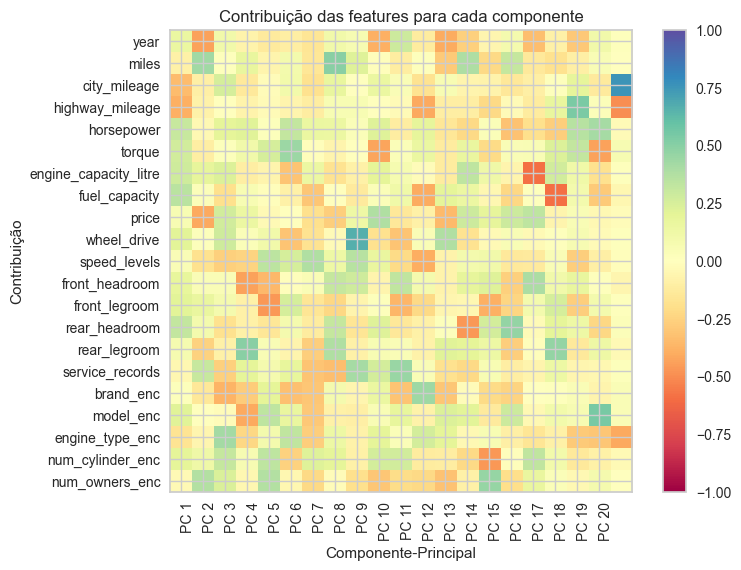

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow(pca.components_.T, cmap="Spectral", vmax=1, vmin=-1)
plt.yticks(range(len(data_with_encoding.columns)), data_with_encoding.columns)
plt.xticks(range(20), [f"PC {i}" for i in range(1, 21)], rotation=90, ha="left")
plt.xlabel("Componente-Principal")
plt.ylabel("Contribuição")
plt.title("Contribuição das features para cada componente")
plt.colorbar()


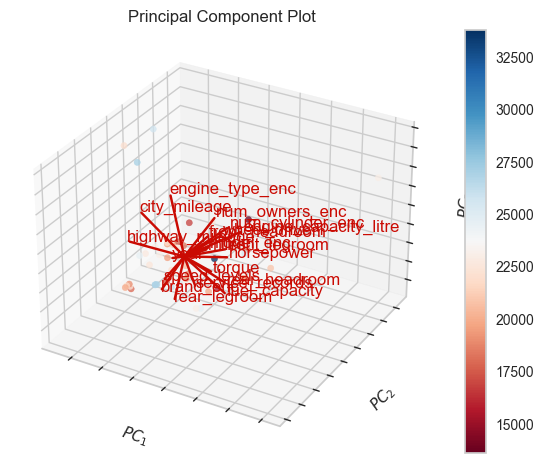

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [108]:
from yellowbrick.features import PCA

X = data_with_encoding.drop("price", axis=1)
y = data_with_encoding["price"]
visualizer = PCA(scale=True, proj_features=True, projection=3)
visualizer.fit_transform(X, y)
visualizer.show()


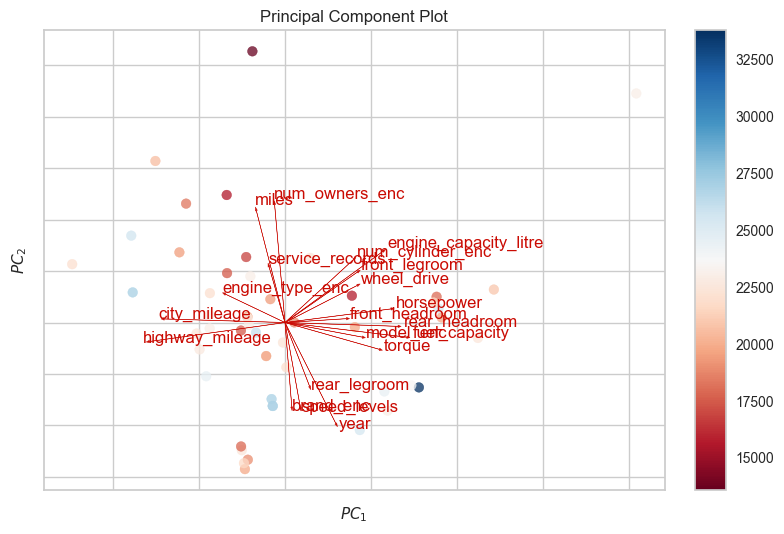

PCA(ax=<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>,
    colormap='RdBu', proj_features=True)

In [110]:
from yellowbrick.features import pca_decomposition

pca_decomposition(X, y, scale=True, proj_features=True, projection=2)


In [ ]:
from scipy.stats import chi2_contingency

array = df_encoded_vars["brand_enc"].T.to_numpy()
array = np.stack((array, df_encoded_vars["model_enc"].T.to_numpy()))
res = chi2_contingency(array)
print(res.pvalue)
